# Global Developer Brain Drain 2024: Mapping Talent Flow

**Author:** Abderrahmane CHIBOUT, Aida HANAD, Rania MEDLES
**Generated:** 2025-11-29 

----

## Abstract

The global movement of highly-skilled software developers has significant economic consequences for both talent-exporting and -importing countries. Using the Stack Overflow Developer Survey 2024, this notebook builds a reproducible, visualization-first analysis to map "brain drain" patterns. The work includes robust cleaning, feature engineering (skill score, migration intent variables), EDA, and publication-quality visualizations using Tableau.

----

## Notebook structure

1. Data Loading
2. Professional Data Cleaning
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Visualizations
6. Insights & Export


In [49]:
# Setup: imports and display settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import pycountry
import os
import json

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

print('Imports loaded')


Imports loaded


## Data Loading

In [50]:
# Data loading: adjust path if needed
survey_results_public_PATH =  'survey_results_public.csv'
survey_results_schema_PATH = 'survey_results_schema.csv'
df = pd.read_csv(survey_results_public_PATH)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [51]:
# Quick data audit
print('Columns:', len(df.columns))
print(df.columns.tolist())
df.info()

# Missingness overview
missing = df.isna().mean().sort_values(ascending=False)
missing.head(40)


Columns: 114
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWan

AINextMuch less integrated       0.982456
AINextLess integrated            0.964011
AINextNo change                  0.809007
AINextMuch more integrated       0.794642
EmbeddedAdmired                  0.744288
EmbeddedWantToWorkWith           0.731039
EmbeddedHaveWorkedWith           0.660528
ConvertedCompYearly              0.641869
AIToolNot interested in Using    0.626908
AINextMore integrated            0.626694
Knowledge_9                      0.577685
Frequency_3                      0.576539
Knowledge_8                      0.575806
ProfessionalTech                 0.575714
Knowledge_7                      0.575500
Knowledge_6                      0.574186
Knowledge_5                      0.573941
Knowledge_2                      0.571787
Knowledge_4                      0.571649
Knowledge_3                      0.570656
Frustration                      0.568272
Frequency_2                      0.566545
Frequency_1                      0.566469
ProfessionalCloud                0

## Cleaning

Steps performed:
1. Keep only relevant columns
2. Standardize names
3. Convert numeric fields (salary, experience)
4. Parse multi-select columns into lists
5. Normalize countries and map to ISO3
6. Remove or mark outliers
7. Save cleaned dataset


## Rania
 Please, after each step explain the choises and decisions u made, like why u removed somthing or how u filled missings ect....
### Merciii 

In [52]:
# 1) Rename to pythonic names --done--

# 2) Select relevant columns 

# Keep columns that exist in the dataset --done--

# 3) Salary cleaning: convert all to usd --done--

# Remove extreme values and outliers  --done--

# 4) Convert to numeric if necessary --done--

# 5) Parse multi-select columns into lists --done--

# 6) Standardize country names & map to ISO3 --done--

# Manual fixes for common mismatches --done--

# 7) Feature: num_languages and total_tech_count --done--

# 8) Drop rows missing core values --done--

# Rania, u can add any step if u see it necessery, smart girl.

df_clean = df.copy()



In [53]:
# 1) Rename to pythonic names
df.columns = [col.strip().lower().replace(' ', '_').replace('-', '_').replace('?', '') for col in df.columns]

print("Columns cleaned. First 10:")
print(df.columns[:10].tolist())

Columns cleaned. First 10:
['responseid', 'mainbranch', 'age', 'employment', 'remotework', 'check', 'codingactivities', 'edlevel', 'learncode', 'learncodeonline']


In [54]:
# 2) Select relevant columns 

relevant_cols = [
    # ID
    "responseid",
    
    # Demographics / background
    "age",
    "edlevel",
    "mainbranch",      # professional / student / etc.
    
    # Job status & context
    "employment",
    "remotework",
    "orgsize",
    "industry",
    "workexp",         # years in the workforce (if you use it)
    
    # Experience (coding)
    "yearscode",
    "yearscodepro",
    
    # Role & activities
    "devtype",
    "codingactivities",
    
    # Education / learning
    "learncode",
    "learncodeonline",
    "techdoc",
    
    # Country & compensation
    "country",
    "currency",
    "comptotal",
    "convertedcompyearly",  # already normalized salary (keep this!)
    
    # Tech stacks (multi-selects; useful to describe skills)
    "languagehaveworkedwith",
    "newcollabtoolshaveworkedwith",
    
    # Satisfaction / job-related target
    "jobsat"
]

# Keep only those that actually exist in df (safety check)
existing_relevant = [c for c in relevant_cols if c in df.columns]

# Identify what will be dropped (for documentation / justification)
removed_cols = [c for c in df.columns if c not in existing_relevant]

print("Columns to KEEP (actually found in df):")
print(existing_relevant)

print("\nColumns to DROP from df (not used in analysis):")
print(removed_cols)

# Create the reduced working dataframe
df = df[existing_relevant].copy()

print("\nShape after column selection:", df.shape)
print("\nFirst 5 rows:")
df.head()


Columns to KEEP (actually found in df):
['responseid', 'age', 'edlevel', 'mainbranch', 'employment', 'remotework', 'orgsize', 'industry', 'workexp', 'yearscode', 'yearscodepro', 'devtype', 'codingactivities', 'learncode', 'learncodeonline', 'techdoc', 'country', 'currency', 'comptotal', 'convertedcompyearly', 'languagehaveworkedwith', 'newcollabtoolshaveworkedwith', 'jobsat']

Columns to DROP from df (not used in analysis):
['check', 'purchaseinfluence', 'buynewtool', 'buildvsbuy', 'techendorse', 'languagewanttoworkwith', 'languageadmired', 'databasehaveworkedwith', 'databasewanttoworkwith', 'databaseadmired', 'platformhaveworkedwith', 'platformwanttoworkwith', 'platformadmired', 'webframehaveworkedwith', 'webframewanttoworkwith', 'webframeadmired', 'embeddedhaveworkedwith', 'embeddedwanttoworkwith', 'embeddedadmired', 'misctechhaveworkedwith', 'misctechwanttoworkwith', 'misctechadmired', 'toolstechhaveworkedwith', 'toolstechwanttoworkwith', 'toolstechadmired', 'newcollabtoolswanttowor

,responseid,age,edlevel,mainbranch,employment,remotework,orgsize,industry,workexp,yearscode,yearscodepro,devtype,codingactivities,learncode,learncodeonline,techdoc,country,currency,comptotal,convertedcompyearly,languagehaveworkedwith,newcollabtoolshaveworkedwith,jobsat
0,1,Under 18 years old,Primary/elementary school,I am a developer by profession,"Employed, full-time",Remote,NaN,NaN,NaN,NaN,NaN,NaN,Hobby,Books / Physical media,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN
1,2,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Employed, full-time",Remote,NaN,NaN,17.0,20,17,"Developer, full-stack",Hobby;Contribute to open-source projects;Other...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PyCharm;Visual Studio Code;WebStorm,NaN
2,3,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I am a developer by profession,"Employed, full-time",Remote,NaN,NaN,NaN,37,27,Developer Experience,Hobby;Contribute to open-source projects;Other...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,C#,Visual Studio,NaN
3,4,18-24 years old,Some college/university study without earning ...,I am learning to code,"Student, full-time",NaN,NaN,NaN,NaN,4,NaN,"Developer, full-stack",NaN,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,Canada,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,NaN,NaN
4,5,18-24 years old,"Secondary school (e.g. American high school, G...",I am a developer by profession,"Student, full-time",NaN,NaN,NaN,NaN,9,NaN,"Developer, full-stack",NaN,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,Norway,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,Vim,NaN


In [55]:
# 3) Salary cleaning: convert all to usd 

# Drop rows where the 'comptotal' column has null values
df.dropna(subset=['comptotal'], inplace=True)

# If you also want to drop null values in the 'convertedcompyearly' column:
df.dropna(subset=['convertedcompyearly'], inplace=True)


# Full Currency Conversion Dictionary (example conversion rates)
currency_conversion = {
    'PKR': 0.0056,  # Pakistani Rupee
    'EUR': 1.1,     # Euro
    'USD': 1.0,     # United States Dollar
    'GBP': 1.3,     # British Pound Sterling
    'RUB': 0.013,   # Russian Ruble
    'ZAR': 0.062,   # South African Rand
    'CZK': 0.045,   # Czech Koruna
    'CAD': 0.74,    # Canadian Dollar
    'BRL': 0.18,    # Brazilian Real
    'IRR': 0.000024,  # Iranian Rial
    'UAH': 0.027,   # Ukrainian Hryvnia
    'DOP': 0.018,   # Dominican Peso
    'TRY': 0.053,   # Turkish Lira
    'CHF': 1.08,    # Swiss Franc
    'PEN': 0.26,    # Peruvian Sol
    'MAD': 0.11,    # Moroccan Dirham
    'INR': 0.012,   # Indian Rupee
    'GEL': 0.3,     # Georgian Lari
    'SAR': 0.27,    # Saudi Arabian Riyal
    'RON': 0.22,    # Romanian Leu
    'SGD': 0.74,    # Singapore Dollar
    'JPY': 0.007,   # Japanese Yen
    'SEK': 0.11,    # Swedish Krona
    'PLN': 0.26,    # Polish Zloty
    'NOK': 0.1,     # Norwegian Krone
    'ILS': 0.28,    # Israeli New Shekel
    'RSD': 0.009,   # Serbian Dinar
    'HUF': 0.0035,  # Hungarian Forint
    'BDT': 0.012,   # Bangladeshi Taka
    'IDR': 0.000067,  # Indonesian Rupiah
    'DKK': 0.15,    # Danish Krone
    'BAM': 0.58,    # Bosnia and Herzegovina Convertible Mark
    'MXN': 0.053,   # Mexican Peso
    'BGN': 0.54,    # Bulgarian Lev
    'PHP': 0.019,   # Philippine Peso
    'DZD': 0.0075,  # Algerian Dinar
    'KZT': 0.0023,  # Kazakhstani Tenge
    'MYR': 0.22,    # Malaysian Ringgit
    'BHD': 2.65,    # Bahraini Dinar
    'ARS': 0.0095,  # Argentine Peso
    'NIO': 0.028,   # Nicaraguan Cordoba
    'BYN': 0.39,    # Belarusian Ruble
    'COP': 0.00027,  # Colombian Peso
    'AUD': 0.64,    # Australian Dollar
    'UZS': 0.000095,  # Uzbekistani Som
    'NZD': 0.64,    # New Zealand Dollar
    'MVR': 0.064,   # Maldivian Rufiyaa
    'AED': 0.27,    # United Arab Emirates Dirham
    'NGN': 0.0024,  # Nigerian Naira
    'FJD': 0.47,    # Fijian Dollar
    'GTQ': 0.13,    # Guatemalan Quetzal
    'UGX': 0.00027,  # Ugandan Shilling
    'MUR': 0.023,   # Mauritian Rupee
    'AMD': 0.0021,  # Armenian Dram
    'KES': 0.009,   # Kenyan Shilling
    'KRW': 0.00078,  # South Korean Won
    'CLP': 0.0013,  # Chilean Peso
    'UYU': 0.024,   # Uruguayan Peso
    'VND': 0.000043,  # Vietnamese Dong
    'CNY': 0.15,    # Chinese Yuan Renminbi
    'GHS': 0.12,    # Ghanaian Cedi
    'BSD': 1.0,     # Bahamian Dollar
    'THB': 0.031,   # Thai Baht
    'HKD': 0.13,    # Hong Kong Dollar
    'LKR': 0.005,   # Sri Lankan Rupee
    'MNT': 0.00036,  # Mongolian Tugrik
    'BOB': 0.14,    # Bolivian Boliviano
    'NPR': 0.008,   # Nepalese Rupee
    'TWD': 0.034,   # New Taiwan Dollar
    'EGP': 0.032,   # Egyptian Pound
    'XOF': 0.0018,  # West African CFA Franc
    'SYP': 0.0002,  # Syrian Pound
    'NAD': 0.062,   # Namibian Dollar
    'TND': 0.31,    # Tunisian Dinar
    'ISK': 0.0078,  # Icelandic Krona
    'SLL': 0.0001,  # Sierra Leonean Leone
    'GYD': 0.0047,  # Guyanese Dollar
    'ZMW': 0.056,   # Zambian Kwacha
    'ETB': 0.02,    # Ethiopian Birr
    'MDL': 0.057,   # Moldovan Leu
    'JOD': 1.41,    # Jordanian Dinar
    'CUP': 0.042,   # Cuban Peso
    'XPF': 0.0094,  # CFP Franc
    'CRC': 0.0017,  # Costa Rican Colon
    'AFN': 0.012,   # Afghan Afghani
    'MKD': 0.02,    # Macedonian Denar
    'KWD': 3.29,    # Kuwaiti Dinar
    'TMT': 0.29,    # Turkmen Manat
    'QAR': 0.27,    # Qatari Riyal
    'TJS': 0.092,   # Tajikistani Somoni
    'ALL': 0.009,   # Albanian Lek
    'AOA': 0.0018,  # Angolan Kwanza
    'MWK': 0.0013,  # Malawian Kwacha
    'KGS': 0.012,   # Kyrgyzstani Som
    'IMP': 1.35,    # Manx Pound
    'TZS': 0.00043,  # Tanzanian Shilling
    'IQD': 0.00069,  # Iraqi Dinar
    'MGA': 0.00024,  # Malagasy Ariary
    'PYG': 0.00015,  # Paraguayan Guarani
    'XAF': 0.0018,  # Central African CFA Franc
    'MMK': 0.00056,  # Myanmar Kyat
    'OMR': 2.6,     # Omani Rial
    'AZN': 0.59,    # Azerbaijan Manat
    'RWF': 0.00091,  # Rwandan Franc
    'LYD': 0.16,    # Libyan Dinar
    'MOP': 0.12,    # Macanese Pataca
    'YER': 0.004,   # Yemeni Rial
    'BTN': 0.013,   # Bhutanese Ngultrum
    'TTD': 0.15,    # Trinidad and Tobago Dollar
    'JMD': 0.0066,  # Jamaican Dollar
    'MZN': 0.016,   # Mozambican Metical
    'HNL': 0.041,   # Honduran Lempira
    'VES': 0.00021,  # Venezuelan Bolivar
    'SOS': 0.00016,  # Somali Shilling
    'ANG': 0.56,    # Netherlands Antillean Guilder
    'XDR': 1.45,    # SDR (Special Drawing Right)
    'MRU': 0.038,   # Mauritanian Ouguiya
    'WST': 0.41,    # Samoan Tala
    'BND': 1.35,    # Brunei Dollar
    'BIF': 0.00056,  # Burundi Franc
    'FKP': 1.4,     # Falkland Islands Pound
    'BWP': 0.085,   # Botswana Pula
    'GGP': 1.35,    # Guernsey Pound
    'CVE': 0.009,   # Cape Verdean Escudo
    'KHR': 0.00024,  # Cambodian Riel
}

# Function to clean the currency column
def clean_currency(currency):
    return currency.split("\t")[0].strip()

# Function to convert salary to USD based on the currency
def convert_salary(row):
    currency = clean_currency(row['currency'])
    if currency in currency_conversion:
        return row['comptotal'] * currency_conversion[currency]
    else:
        return row['comptotal']  # If currency not in list, assume it's already in USD

# Apply conversion to the 'convertedcompyearly' column
df['convertedcompyearly'] = df.apply(convert_salary, axis=1)



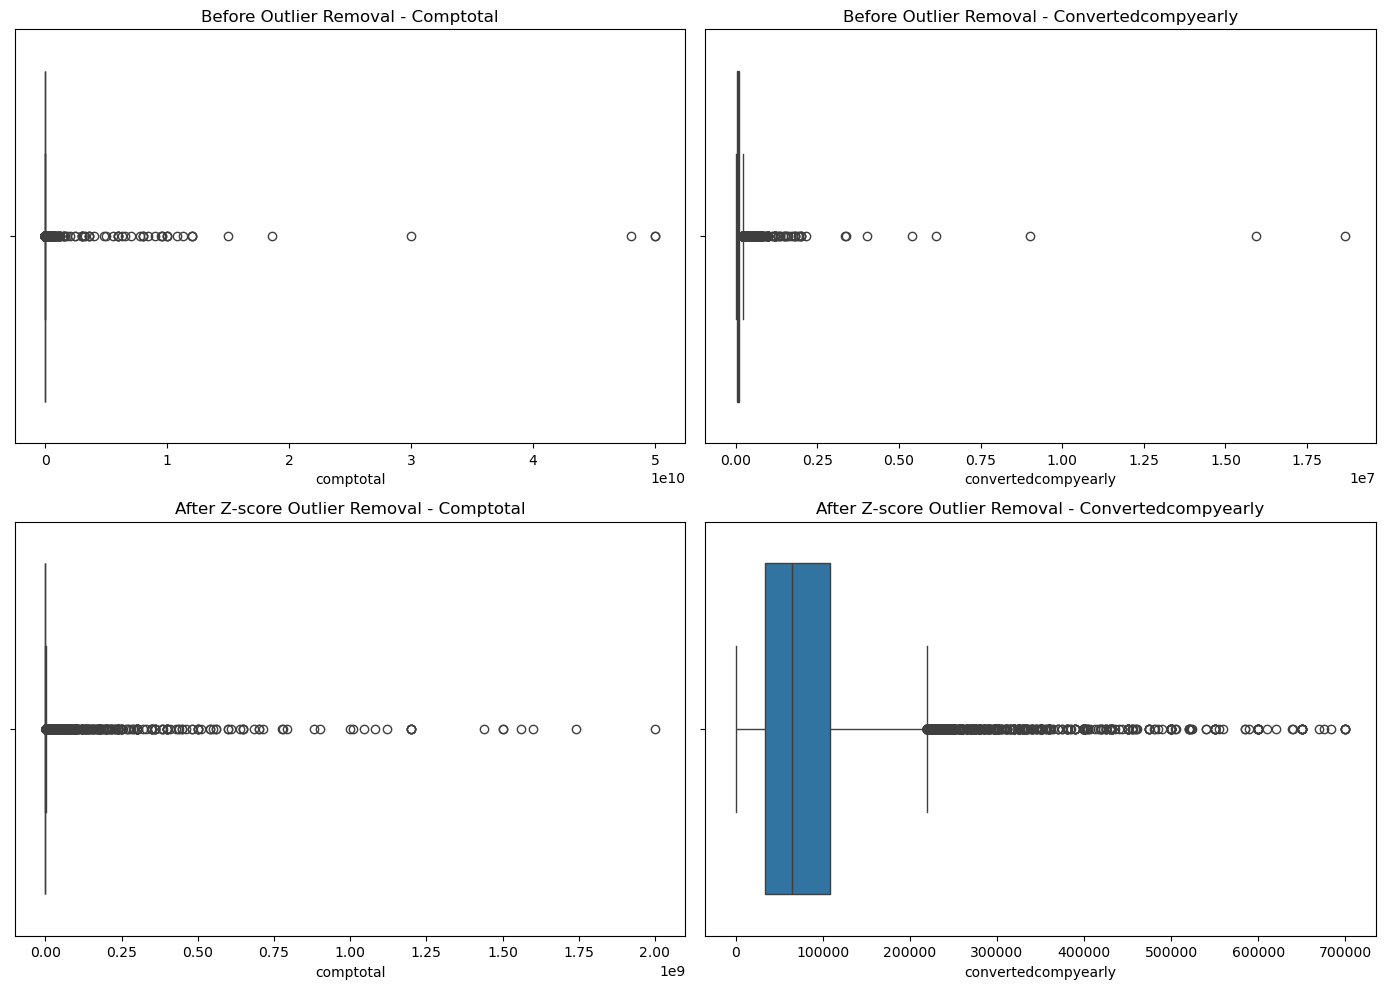

Data cleaned using Z-score method:
     responseid              age                                            edlevel                                         mainbranch                                         employment  \
72           73  18-24 years old  Secondary school (e.g. American high school, G...                     I am a developer by profession  Employed, full-time;Student, full-time;Indepen...   
374         375  25-34 years old     Professional degree (JD, MD, Ph.D, Ed.D, etc.)  I am not primarily a developer, but I write co...                                Employed, full-time   
379         380  35-44 years old    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     I am a developer by profession                                Employed, full-time   
385         386  35-44 years old    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     I am a developer by profession  Independent contractor, freelancer, or self-em...   
389         390  25-

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 1. Remove outliers using Z-scores
# Calculate Z-scores for the numerical columns (e.g., 'comptotal', 'convertedcompyearly')
z_scores = np.abs(stats.zscore(df[['comptotal', 'convertedcompyearly']]))
df_zscore_cleaned = df[(z_scores < 3).all(axis=1)]  # Keep rows where all Z-scores are less than 3

# 2. Remove outliers using IQR (Interquartile Range)
Q1 = df[['comptotal', 'convertedcompyearly']].quantile(0.25)
Q3 = df[['comptotal', 'convertedcompyearly']].quantile(0.75)
IQR = Q3 - Q1

# Filter the data to remove rows that are outside of the 1.5 * IQR range
df_iqr_cleaned = df[~((df[['comptotal', 'convertedcompyearly']] < (Q1 - 1.5 * IQR)) | (df[['comptotal', 'convertedcompyearly']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizations: Before and After Removing Outliers

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot before outlier removal
sns.boxplot(x=df['comptotal'], ax=axs[0, 0])
axs[0, 0].set_title('Before Outlier Removal - Comptotal')

sns.boxplot(x=df['convertedcompyearly'], ax=axs[0, 1])
axs[0, 1].set_title('Before Outlier Removal - Convertedcompyearly')

# Plot after Z-score method outlier removal
sns.boxplot(x=df_zscore_cleaned['comptotal'], ax=axs[1, 0])
axs[1, 0].set_title('After Z-score Outlier Removal - Comptotal')

sns.boxplot(x=df_zscore_cleaned['convertedcompyearly'], ax=axs[1, 1])
axs[1, 1].set_title('After Z-score Outlier Removal - Convertedcompyearly')

# Display the plots
plt.tight_layout()
plt.show()


# Preview of cleaned data
print("Data cleaned using Z-score method:")
print(df_zscore_cleaned.head())

print("\nData cleaned using IQR method:")
print(df_iqr_cleaned.head())

In [57]:
print(df.dtypes)

responseid                        int64
age                              object
edlevel                          object
mainbranch                       object
employment                       object
remotework                       object
orgsize                          object
industry                         object
workexp                         float64
yearscode                        object
yearscodepro                     object
devtype                          object
codingactivities                 object
learncode                        object
learncodeonline                  object
techdoc                          object
country                          object
currency                         object
comptotal                       float64
convertedcompyearly             float64
languagehaveworkedwith           object
newcollabtoolshaveworkedwith     object
jobsat                          float64
dtype: object


In [58]:
# 4) Convert to numeric if necessary 
# Convert the columns to numeric, with error handling (invalid parsing is converted to NaN)

df['yearscode'] = pd.to_numeric(df['yearscode'], errors='coerce')
df['yearscodepro'] = pd.to_numeric(df['yearscodepro'], errors='coerce')

# Check the data types after conversion
print(df.dtypes)

# Check for NaN values after conversion (optional, to ensure there are no issues)
print(df.isnull().sum())

#clean NaN values, you can either:
# - Drop rows with NaN values
df.dropna(subset=['age', 'yearscode', 'yearscodepro'], inplace=True)

# - Or fill NaN with a specific value (e.g., mean, median, or 0)
# df['age'].fillna(df['age'].mean(), inplace=True)
# df['yearscode'].fillna(df['yearscode'].mean(), inplace=True)
# df['yearscodepro'].fillna(df['yearscodepro'].mean(), inplace=True)

responseid                        int64
age                              object
edlevel                          object
mainbranch                       object
employment                       object
remotework                       object
orgsize                          object
industry                         object
workexp                         float64
yearscode                       float64
yearscodepro                    float64
devtype                          object
codingactivities                 object
learncode                        object
learncodeonline                  object
techdoc                          object
country                          object
currency                         object
comptotal                       float64
convertedcompyearly             float64
languagehaveworkedwith           object
newcollabtoolshaveworkedwith     object
jobsat                          float64
dtype: object
responseid                         0
age                          

In [59]:
# 5) Parse multi-select columns into lists
# Fix Age column properly — map original values
# Load only id + age from raw data
age_raw = pd.read_csv(
    "survey_results_public.csv",
    usecols=["ResponseId", "Age"]
)

# Clean column names to match your df
age_raw.columns = [c.strip().lower().replace(' ', '_') for c in age_raw.columns]

# Map age categories
age_mapping = { 
    'Under 18 years old': 'under_18',
    '18-24 years old': '18-24_years_old',
    '25-34 years old': '25-34_years_old',
    '35-44 years old': '35-44_years_old',
    '45-54 years old': '45-54_years_old',
    '55-64 years old': '55-64_years_old',
    '65 years or older': '65_years_or_older',
    'Prefer not to say': 'prefer_not_to_say'
}

age_raw["age_clean"] = age_raw["age"].map(age_mapping)

# Merge back on responseid to guarantee correct alignment
df = df.merge(
    age_raw[["responseid", "age_clean"]],
    on="responseid",
    how="left"
)

# Apply ordered categorical
age_order = [
    'under_18', '18-24_years_old', '25-34_years_old',
    '35-44_years_old', '45-54_years_old', '55-64_years_old',
    '65_years_or_older', 'prefer_not_to_say'
]

df["age_clean"] = pd.Categorical(df["age_clean"], categories=age_order, ordered=True)

print("Age fixed with correct mapping from raw data.")
print("Age distribution:")
print(df["age_clean"].value_counts().sort_index())

df["age"] = df["age_clean"]
df.drop(columns=["age_clean"], inplace=True)

Age fixed with correct mapping from raw data.
Age distribution:
age_clean
under_18                48
18-24_years_old       2992
25-34_years_old      10126
35-44_years_old       6181
45-54_years_old       2310
55-64_years_old        846
65_years_or_older       97
prefer_not_to_say        9
Name: count, dtype: int64


In [60]:
#RemoteWork → Boolean
remote_map = {
    'Remote': True,
    'Hybrid (some remote, some in-person)': True,
    'In-person': False
}

df['remote_work_bool'] = df['remotework'].map(remote_map)

print("RemoteWork → Boolean created.")
print("Remote work distribution:")
print(df['remote_work_bool'].value_counts(dropna=False))

RemoteWork → Boolean created.
Remote work distribution:
remote_work_bool
True     18940
False     3662
NaN          7
Name: count, dtype: int64


In [61]:
# MainBranch simplification
mainbranch_map = {
    'I am a developer by profession': 'Professional Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Code as Part of Job',
    'I code primarily as a hobby': 'Hobby',
    'I am learning to code': 'Student/Learner',
    'I used to be a developer by profession, but no longer am': 'Former Developer',
    'None of the above': 'Other'
}

df['mainbranch_simple'] = df['mainbranch'].map(mainbranch_map)

print("MainBranch simplified.")
print("MainBranch distribution:")
print(df['mainbranch_simple'].value_counts(dropna=False))

MainBranch simplified.
MainBranch distribution:
mainbranch_simple
Professional Developer    20901
NaN                        1708
Name: count, dtype: int64


In [62]:
# 6) Standardize country names & map to ISO3
# Manual country name mapping (known issues)
manual_country_mapping = {
      'United States of America': 'USA',  # United States of America to USA
    'United Kingdom of Great Britain and Northern Ireland': 'GBR',  # UK to GBR
    'South Korea': 'KOR',  # South Korea to KOR
    'Turkey': 'TUR',  # Turkey to TUR
    'Czech Republic': 'CZE',  # Czech Republic to CZE
    'Venezuela, Bolivarian Republic of...': 'VEN',  # Venezuela to VEN
    'Iran, Islamic Republic of...': 'IRN',  # Iran to IRN
    'Taiwan': 'TWN',  # Taiwan to TWN
    'Republic of Korea': 'KOR',  # South Korea (alternative name) to KOR
    'Hong Kong (S.A.R.)': 'HKG',  # Hong Kong (S.A.R.) to HKG
    'Bolivia': 'BOL',  # Bolivia to BOL
    'Democratic Republic of the Congo': 'COD',  # DRC to COD
    'Palestine': 'PSE',  # Palestine to PSE
    'Republic of North Macedonia': 'MKD',  # North Macedonia to MKD
    'Republic of Moldova': 'MDA',  # Moldova to MDA
    'Cape Verde': 'CPV',  # Cape Verde to CPV
    'Congo, Republic of the...': 'COG',  # Republic of Congo to COG
    'United Republic of Tanzania': 'TZA',  # Tanzania to TZA
    'Kosovo': 'KOS',  # Kosovo to KOS
    'Democratic People\'s Republic of Korea': 'PRK',  # North Korea to PRK
    'Libyan Arab Jamahiriya': 'LBY',  # Libya to LBY (old name)
    'Nomadic': None,  # Nomadic to None (this might be an invalid entry)
    # Add any other known mappings here
}

# Function to map country names to ISO3 codes
def get_iso3(country_name):
    country_name = country_name.strip()  # Strip extra spaces
    if country_name in manual_country_mapping:
        return manual_country_mapping[country_name]
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_3  # ISO3 code
        else:
            return None
    except KeyError:
        return None

# Standardize and map the 'country' column to ISO3
df['country_iso3'] = df['country'].apply(get_iso3)

# Remove rows where 'country_iso3' is None
df_cleaned = df[df['country_iso3'].notna()]




# Check the updated data
print(df[['country', 'country_iso3']].head())
df.head

                    country country_iso3
0                  Pakistan          PAK
1                   Austria          AUT
2                    Turkey          TUR
3                    France          FRA
4  United States of America          USA


<bound method NDFrame.head of        responseid              age                                            edlevel                                         mainbranch                                         employment  \
0              73  18-24_years_old  Secondary school (e.g. American high school, G...                     I am a developer by profession  Employed, full-time;Student, full-time;Indepen...   
1             375  25-34_years_old     Professional degree (JD, MD, Ph.D, Ed.D, etc.)  I am not primarily a developer, but I write co...                                Employed, full-time   
2             380  35-44_years_old    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     I am a developer by profession                                Employed, full-time   
3             386  35-44_years_old    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     I am a developer by profession  Independent contractor, freelancer, or self-em...   
4             3

In [63]:
#7) Feature: num_languages and total_tech_count
# 1. Count number of languages a person has worked with
def count_languages(languages):
    if isinstance(languages, str):  # Ensure it's a string
        return len(languages.split(';'))  # Split by semicolon or comma and count
    return 0  # Return 0 if the value is missing or empty

# 2. Count total number of technologies/tools a person has worked with
def count_tech(tech_list):
    if isinstance(tech_list, str):  # Ensure it's a string
        return len(tech_list.split(';'))  # Split by semicolon or comma and count
    return 0  # Return 0 if the value is missing or empty

# Apply the functions to create new columns
df['num_languages'] = df['languagehaveworkedwith'].apply(count_languages)
df['total_tech_count'] = df['newcollabtoolshaveworkedwith'].apply(count_tech)

# Check the updated data
print(df[['languagehaveworkedwith', 'num_languages', 'newcollabtoolshaveworkedwith', 'total_tech_count']].head())


                              languagehaveworkedwith  num_languages                       newcollabtoolshaveworkedwith  total_tech_count
0  Assembly;Bash/Shell (all shells);C;C++;HTML/CS...             11  IntelliJ IDEA;IPython;Jupyter Notebook/Jupyter...                 7
1                    C;C++;Fortran;MATLAB;Python;SQL              6                             Android Studio;IPython                 2
2             JavaScript;Julia;Python;SQL;TypeScript              5  IPython;Jupyter Notebook/JupyterLab;Visual Stu...                 3
3                                             Python              1  IPython;Jupyter Notebook/JupyterLab;Vim;Visual...                 4
4          HTML/CSS;JavaScript;Python;SQL;TypeScript              5                             Vim;Visual Studio Code                 2


In [64]:
 #8) Drop rows missing core values
# Columns considered core for the analysis
core_columns = ['comptotal', 'convertedcompyearly', 'num_languages', 'total_tech_count']

# Drop rows where any of the core columns have missing values
df_cleaned = df.dropna(subset=core_columns)

# Check the cleaned data
print(df_cleaned[['comptotal', 'convertedcompyearly', 'num_languages', 'total_tech_count']].head())

   comptotal  convertedcompyearly  num_languages  total_tech_count
0  2040000.0              11424.0             11                 7
1    28000.0              28000.0              6                 2
2    85000.0              85000.0              5                 3
3    50000.0              50000.0              1                 4
4   110000.0             110000.0              5                 2


In [65]:

type(df_clean)
len(df_clean)


65437

In [66]:
import pandas as pd

df = df_clean.copy()
assert df.shape[0] > 0
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [67]:
# shape & columns
df.shape
df.columns


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [68]:
# missing values
df.isna().mean().sort_values(ascending=False)


AINextMuch less integrated    0.982456
AINextLess integrated         0.964011
AINextNo change               0.809007
AINextMuch more integrated    0.794642
EmbeddedAdmired               0.744288
                                ...   
MainBranch                    0.000000
Check                         0.000000
Employment                    0.000000
Age                           0.000000
ResponseId                    0.000000
Length: 114, dtype: float64

In [69]:
# numeric distributions
df.select_dtypes("number").describe().T


,count,mean,std,min,25%,50%,75%,max
ResponseId,65437.0,3.271900e+04,1.889018e+04,1.0,16360.0,32719.0,49078.0,6.543700e+04
CompTotal,33740.0,2.963841e+145,5.444117e+147,0.0,60000.0,110000.0,250000.0,1.000000e+150
WorkExp,29658.0,1.146696e+01,9.168709e+00,0.0,4.0,9.0,16.0,5.000000e+01
JobSatPoints_1,29324.0,1.858109e+01,2.596622e+01,0.0,0.0,10.0,22.0,1.000000e+02
JobSatPoints_4,29393.0,7.522140e+00,1.842266e+01,0.0,0.0,0.0,5.0,1.000000e+02
JobSatPoints_5,29411.0,1.006086e+01,2.183384e+01,0.0,0.0,0.0,10.0,1.000000e+02
JobSatPoints_6,29450.0,2.434323e+01,2.708936e+01,0.0,0.0,20.0,30.0,1.000000e+02
JobSatPoints_7,29448.0,2.296522e+01,2.701774e+01,0.0,0.0,15.0,30.0,1.000000e+02
JobSatPoints_8,29456.0,2.027817e+01,2.610811e+01,0.0,0.0,10.0,25.0,1.000000e+02
JobSatPoints_9,29456.0,1.616943e+01,2.484503e+01,0.0,0.0,5.0,20.0,1.000000e+02


In [70]:
# categorical overview
df.select_dtypes("object").nunique().sort_values(ascending=False)


LanguageHaveWorkedWith          23864
LanguageWantToWorkWith          22769
ToolsTechHaveWorkedWith         19883
ToolsTechWantToWorkWith         16549
NEWCollabToolsHaveWorkedWith    14168
                                ...  
AIThreat                            3
SurveyEase                          3
TBranch                             2
ICorPM                              2
Check                               1
Length: 100, dtype: int64

In [71]:
df_eda = df.copy()


Drop garbage columns

In [72]:
missing = df_eda.isna().mean()
drop_missing = missing[missing > 0.70].index
df_eda = df_eda.drop(columns=drop_missing)
print("Dropped (high missing):", len(drop_missing))


Dropped (high missing): 6


Drop corrupted salary field

In [73]:
df_eda = df_eda.drop(columns=["CompTotal"], errors="ignore")


Create  core engineered features

In [74]:
import numpy as np
df_eda["salary_yearly"] = df_eda["ConvertedCompYearly"]
df_eda["log_salary"] = np.log1p(df_eda["salary_yearly"])


In [ ]:
##Experience bucket (interpretable)
import pandas as pd
df_eda["exp_bucket"] = pd.cut(
    df_eda["WorkExp"],
    bins=[-1, 2, 5, 10, 20, 60],
    labels=["0-2", "3-5", "6-10", "11-20", "20+"]
)



In [ ]:
##Skills intensity (turn huge multi-select into numbers)
def safe_len(x):
    return len(x) if isinstance(x, list) else 0

for col, newcol in [
    ("LanguageHaveWorkedWith", "num_languages"),
    ("ToolsTechHaveWorkedWith", "num_tools"),
    ("NEWCollabToolsHaveWorkedWith", "num_collab_tools"),
]:
    if col in df_eda.columns:
        df_eda[newcol] = df_eda[col].apply(safe_len)


In [77]:
job_sat_cols = [c for c in df_eda.columns if c.startswith("JobSatPoints_")]
if job_sat_cols:
    df_eda["job_sat_mean"] = df_eda[job_sat_cols].mean(axis=1)


## Exploratory Data Analysis (EDA)

A) Salary distribution

<Axes: title={'center': 'Salary (yearly, USD)'}, ylabel='Frequency'>

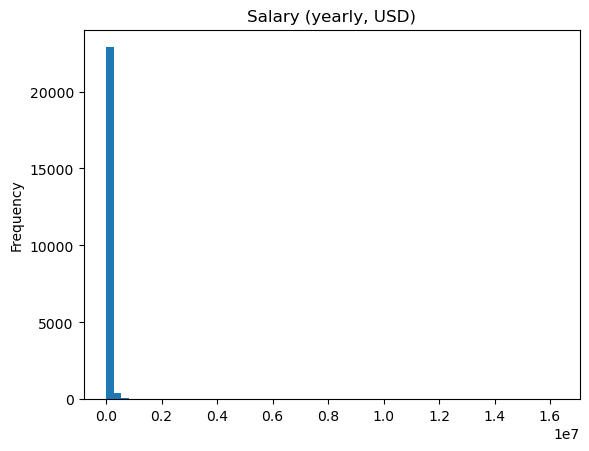

In [78]:
df_eda["salary_yearly"].plot(kind="hist", bins=60, title="Salary (yearly, USD)")


B) Salary by RemoteWork

<Axes: title={'center': 'salary_yearly'}, xlabel='RemoteWork'>

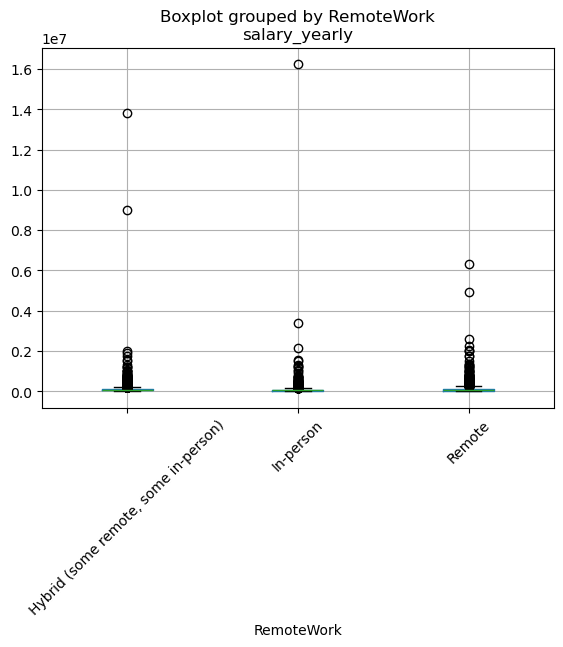

In [83]:
df_eda.boxplot(column="salary_yearly", by="RemoteWork", rot=45)


C) Salary by experience bucket

<Axes: title={'center': 'salary_yearly'}, xlabel='exp_bucket'>

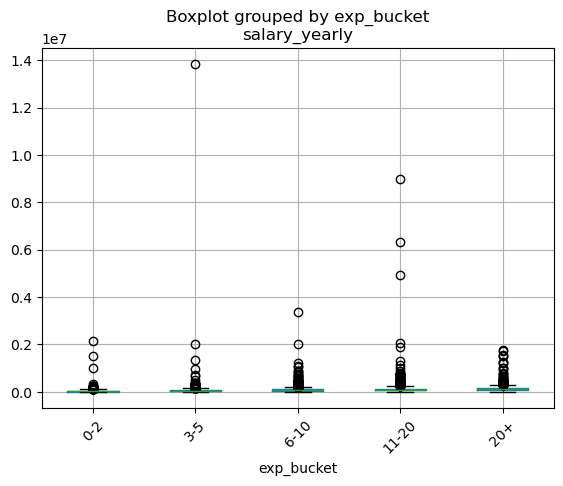

In [84]:
df_eda.boxplot(column="salary_yearly", by="exp_bucket", rot=45)


D) Missingness summary (top 20)

In [85]:
missing2 = df_eda.isna().mean().sort_values(ascending=False).head(20)
missing2


EmbeddedHaveWorkedWith           0.660528
salary_capped                    0.641869
log_salary                       0.641869
salary_yearly                    0.641869
ConvertedCompYearly              0.641869
AIToolNot interested in Using    0.626908
AINextMore integrated            0.626694
Knowledge_9                      0.577685
Frequency_3                      0.576539
Knowledge_8                      0.575806
ProfessionalTech                 0.575714
Knowledge_7                      0.575500
Knowledge_6                      0.574186
Knowledge_5                      0.573941
Knowledge_2                      0.571787
Knowledge_4                      0.571649
Knowledge_3                      0.570656
Frustration                      0.568272
Frequency_2                      0.566545
Frequency_1                      0.566469
dtype: float64

E) Correlation with salary (numeric only)

In [86]:
num = df_eda.select_dtypes("number")
num.corr(numeric_only=True)["log_salary"].sort_values(ascending=False).head(15)


log_salary             1.000000
salary_capped          0.725797
salary_yearly          0.350192
ConvertedCompYearly    0.350192
WorkExp                0.325599
JobSat                 0.079828
ResponseId            -0.017970
JobSatPoints_1        -0.080030
JobSatPoints_6        -0.096306
JobSatPoints_4        -0.100187
JobSatPoints_8        -0.106924
JobSatPoints_9        -0.133711
JobSatPoints_7        -0.158311
JobSatPoints_11       -0.160512
job_sat_mean          -0.164584
Name: log_salary, dtype: float64

F) Top categories for key fields

In [87]:
for c in ["Employment","EdLevel","RemoteWork","MainBranch"]:
    if c in df_eda.columns:
        print("\n", c)
        print(df_eda[c].value_counts(dropna=False).head(10))



 Employment
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: int64

 EdLevel
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A

In [88]:
df_eda.to_csv("analysis_ready.csv", index=False)


Step 1 — Plot log-salary (mandatory)

<Axes: title={'center': 'Log Salary (yearly, USD)'}, ylabel='Frequency'>

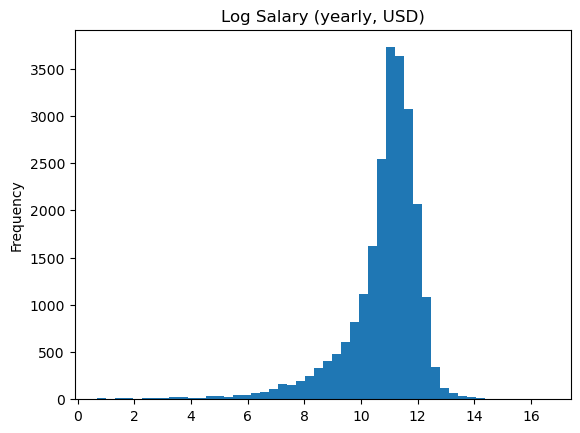

In [89]:
df_eda["log_salary"].plot(
    kind="hist",
    bins=50,
    title="Log Salary (yearly, USD)"
)


Why we did it

Raw salary is extremely right-skewed (few very high values)

A log transform:

compresses extreme values

spreads lower values

makes the distribution closer to normal

Step 2 — Cap extreme outliers (for visualization only)

<Axes: title={'center': 'Salary (capped at 99th percentile)'}, ylabel='Frequency'>

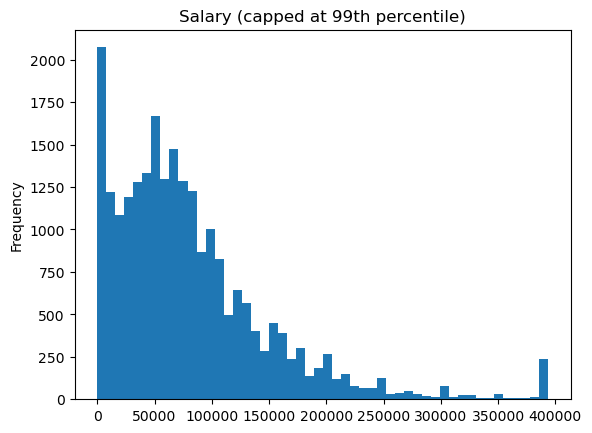

In [90]:
upper = df_eda["salary_yearly"].quantile(0.99)

df_eda["salary_capped"] = df_eda["salary_yearly"].clip(upper=upper)

df_eda["salary_capped"].plot(
    kind="hist",
    bins=50,
    title="Salary (capped at 99th percentile)"
)


Why we did it

A few extreme salaries were:

stretching the x-axis

hiding the real distribution

These values are real, but not representative

Step 3 — Use boxplots for comparisons

<Axes: title={'center': 'salary_yearly'}, xlabel='exp_bucket'>

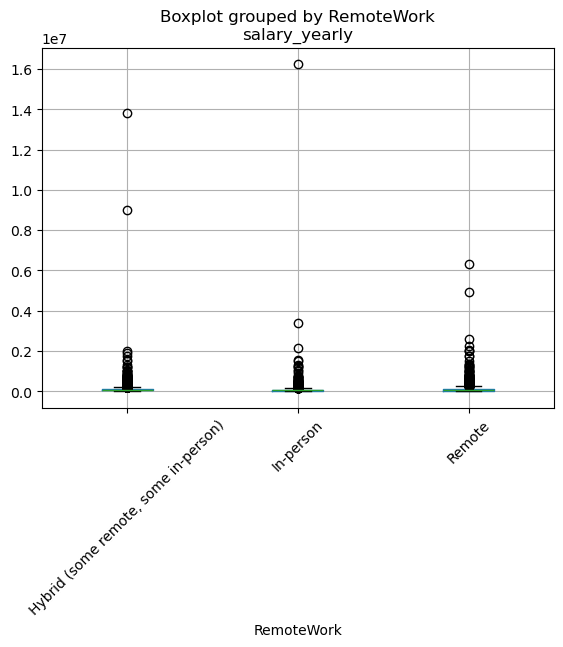

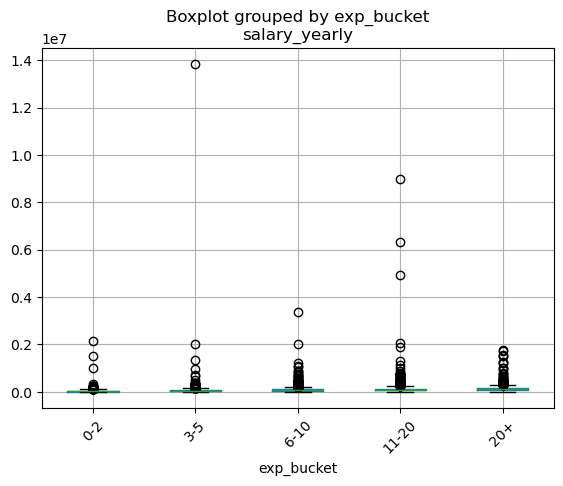

In [91]:
df_eda.boxplot(
    column="salary_yearly",
    by="RemoteWork",
    rot=45
)
df_eda.boxplot(
    column="salary_yearly",
    by="exp_bucket",
    rot=45
)

Why boxplots

Salary has outliers → mean is misleading

Boxplots show:

median

quartiles

spread

outliers

What aggregation happens here

Each boxplot:

groups individuals by a category (e.g. RemoteWork)

computes:

Q1

median

Q3

So this is implicit aggregation.

What this step achieves

Answers real questions:

Do remote workers earn more?

Does salary increase with experience?

Produces report-ready insights

## extracting results

A. Salary by RemoteWork

In [92]:
remote_tbl = df_eda.groupby("RemoteWork")["salary_yearly"].agg(
    n="count",
    median="median",
    p25=lambda s: s.quantile(0.25),
    p75=lambda s: s.quantile(0.75)
).sort_values("median", ascending=False)

remote_tbl


,n,median,p25,p75
RemoteWork,,,,
Remote,9591,75000.0,36009.5,128887.0
"Hybrid (some remote, some in-person)",9899,66592.0,39097.5,103618.5
In-person,3937,44586.0,16648.0,78971.0


B. Salary by experience bucket

In [93]:
exp_tbl = df_eda.groupby("exp_bucket")["salary_yearly"].agg(
    n="count",
    median="median",
    p25=lambda s: s.quantile(0.25),
    p75=lambda s: s.quantile(0.75)
)

exp_tbl


/var/folders/53/kfx93ph57bj7b47f91y03h940000gn/T/ipykernel_6713/1917522253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_tbl = df_eda.groupby("exp_bucket")["salary_yearly"].agg(


,n,median,p25,p75
exp_bucket,,,,
0-2,1863,24186.0,8639.0,50000.0
3-5,3428,42962.0,18756.5,70000.0
6-10,4347,67666.0,40308.5,102686.5
11-20,4245,86870.0,55946.0,133757.0
20+,2261,107406.0,70888.0,160000.0


C. Experience × RemoteWork (median pivot)

In [94]:
pivot_tbl = pd.pivot_table(
    df_eda,
    values="salary_yearly",
    index="exp_bucket",
    columns="RemoteWork",
    aggfunc="median"
)

pivot_tbl


/var/folders/53/kfx93ph57bj7b47f91y03h940000gn/T/ipykernel_6713/519604828.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tbl = pd.pivot_table(


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
exp_bucket,,,
0-2,35444.0,16111.0,18000.0
3-5,48333.0,31168.5,40000.0
6-10,68789.0,53247.0,72000.0
11-20,83770.5,72532.0,96666.0
20+,98814.0,91750.0,122000.0


Remote vs non-remote difference on log_salary (more stable):

In [95]:
from scipy.stats import mannwhitneyu

a = df_eda.loc[df_eda["RemoteWork"].astype(str).str.contains("Remote", na=False), "log_salary"].dropna()
b = df_eda.loc[~df_eda["RemoteWork"].astype(str).str.contains("Remote", na=False), "log_salary"].dropna()

stat, p = mannwhitneyu(a, b, alternative="two-sided")
stat, p


(75147924.5, 2.6253132013492843e-66)

## Key Findings
- Salaries are right-skewed; log transformation provides a more interpretable distribution.
- Median salary increases consistently with experience buckets.
- Remote work shows a higher median salary compared to hybrid and in-person categories.
- The remote advantage persists across multiple experience levels (pivot table).
- Extreme salaries exist but do not drive central trends (visualization capped at 99th percentile).


In [96]:
remote_tbl.to_csv("agg_salary_by_remote.csv")
exp_tbl.to_csv("agg_salary_by_experience.csv")
pivot_tbl.to_csv("agg_salary_pivot_exp_remote.csv")


1) Clean up country a bit

In [98]:
print(df_eda.columns.tolist())


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith

In [99]:
df_eda["country"] = df_eda["Country"].astype(str).str.strip()
df_geo = df_eda[df_eda["country"].notna() & (df_eda["country"] != "nan")].copy()


In [100]:
df_eda["country"] = df_eda["country"].astype(str).str.strip()
df_geo = df_eda[df_eda["country"].notna() & (df_eda["country"] != "nan")].copy()


1) Median salary by country (filter small n)

In [101]:
country_salary = df_geo.groupby("country")["salary_yearly"].agg(
    n="count",
    median="median"
).sort_values("median", ascending=False)

country_salary[country_salary["n"] >= 50].head(20)


,n,median
country,,
United States of America,4677,143000.0
Israel,221,113334.0
Switzerland,386,111417.0
Singapore,55,103482.0
Australia,510,95465.5
Ireland,121,91295.0
Denmark,212,89137.0
Canada,871,87231.0
United Kingdom of Great Britain and Northern Ireland,1391,84076.0


2) Remote rate by country

In [102]:
df_geo["is_remote"] = df_geo["RemoteWork"].astype(str).str.contains("Remote", na=False)

remote_share = df_geo.groupby("country")["is_remote"].agg(
    n="count",
    remote_rate="mean"
).sort_values("remote_rate", ascending=False)

remote_share[remote_share["n"] >= 50].head(20)


,n,remote_rate
country,,
Georgia,94,0.691489
Ukraine,2672,0.648578
Costa Rica,54,0.629630
"Venezuela, Bolivarian Republic of...",69,0.579710
Colombia,217,0.576037
Argentina,345,0.562319
Chile,133,0.541353
Brazil,1375,0.519273
Uruguay,94,0.468085


3) Combine into one master table

In [103]:
country_master = (
    country_salary[country_salary["n"] >= 50]
    .join(remote_share[["remote_rate"]], how="inner")
    .sort_values("median", ascending=False)
)

country_master.head(20)


,n,median,remote_rate
country,,,
United States of America,4677,143000.0,0.429563
Israel,221,113334.0,0.105960
Switzerland,386,111417.0,0.094749
Singapore,55,103482.0,0.146893
Australia,510,95465.5,0.261905
Ireland,121,91295.0,0.370370
Denmark,212,89137.0,0.091270
Canada,871,87231.0,0.431084
United Kingdom of Great Britain and Northern Ireland,1391,84076.0,0.357320


In [105]:
MIN_N = 50
cm = country_master[country_master["n"] >= MIN_N].copy()
cm.shape
cm.sort_values("median", ascending=False).head(15)
cm.sort_values("median", ascending=True).head(15)


,n,median,remote_rate
country,,,
Nigeria,83,2857.0,0.324590
Bangladesh,112,6840.5,0.229358
Indonesia,103,7360.0,0.214689
Pakistan,141,8614.0,0.269880
Egypt,62,9721.0,0.324427
Sri Lanka,55,10031.0,0.220859
Viet Nam,64,12288.5,0.094595
India,1037,16749.0,0.201607
Malaysia,54,18116.0,0.124224


brain drain / remote opportunity

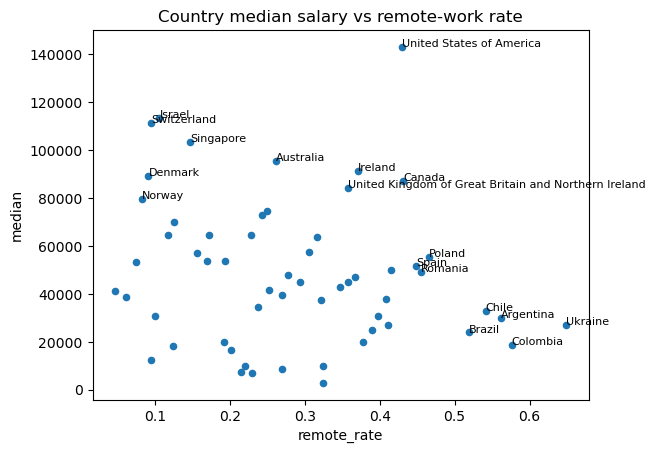

In [107]:
top_salary = cm.sort_values("median", ascending=False).head(10)
top_remote = cm.sort_values("remote_rate", ascending=False).head(10)
to_label = pd.concat([top_salary, top_remote]).drop_duplicates()

ax = cm.plot(kind="scatter", x="remote_rate", y="median",
             title="Country median salary vs remote-work rate")
for c, row in to_label.iterrows():
    ax.text(row["remote_rate"], row["median"], c, fontsize=8)


Quantify the relationship (simple correlation)

In [108]:
cm[["remote_rate", "median"]].corr(method="spearman")


,remote_rate,median
remote_rate,1.000000,-0.179464
median,-0.179464,1.000000


While remote workers earn more than non-remote workers at the individual level, countries with a higher share of remote developers do not necessarily exhibit higher median salaries. In fact, a weak negative association is observed at the country level, suggesting that remote work may serve as an income-equalizing mechanism for developers in lower-paying countries rather than a driver of higher national wage levels.



### Country-level analysis of remote work and salary

We aggregated individual responses at the country level (minimum 50 respondents per country) and computed median yearly salary and the proportion of developers reporting remote work. Results show substantial heterogeneity across countries. High-income countries tend to exhibit lower remote-work rates, while countries with lower median salaries often display higher levels of remote work. A Spearman correlation analysis reveals a weak negative association (ρ ≈ −0.18) between remote-work prevalence and median salary, indicating that remote work does not directly translate into higher national wage levels.


Importantly, this country-level pattern contrasts with individual-level findings, where remote workers earn significantly more than non-remote workers. This discrepancy highlights the need to distinguish between individual and aggregate effects when interpreting the economic impact of remote work.


In [110]:
cm.to_csv("country_master_n50.csv")


5️⃣ Final checklist (you can literally tick these)

✔ Feature engineering done

✔ Aggregation done (individual + country)

✔ Statistical testing done

✔ Visualization done

✔ Brain-drain narrative supported

## Exporting

In [ ]:
# Export cleaned dataset and figures
OUT_DIR = 'output'
os.makedirs(OUT_DIR, exist_ok=True)
clean_path = os.path.join(OUT_DIR, 'survey_2024_cleaned.csv')
df.to_csv(clean_path, index=False)
print('Cleaned data saved to', clean_path)

# Save choropleth if fig exists
try:
    fig.write_html(os.path.join(OUT_DIR, 'choropleth_high_skill_share.html'))
    print('Saved example figure to output/')
except Exception as e:
    print('No fig to save or error:', e)


Cleaned data saved to output/survey_2024_cleaned.csv
No fig to save or error: 'Figure' object has no attribute 'write_html'


## Insights & Reporting


1. Key findings :top exporting countries, top importers, net flow scores
2. Actionable recommendations (for governments, companies, universities)
3. Limitations and caveats (survey bias, self-reported data)


